# Import

In [37]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.decomposition import DictionaryLearning
from metrics import root_mean_squared_relative_error

from utils import sliding_windows_partitions

import yfinance as yf

import matplotlib.pyplot as plt

TRAIN_PERCENTAGE = 0.8

# Load a data

In [34]:
df = yf.download('AAPL', start='2010-01-01', end='2020-01-01')
df = df['Close'].values.squeeze()
df

[*********************100%***********************]  1 of 1 completed


array([ 6.44741344,  6.45855856,  6.35582781, ..., 70.23900604,
       70.65587616, 71.1721344 ])

In [35]:
data_historical = df[:int(TRAIN_PERCENTAGE*len(df))]
data_test = df[int(TRAIN_PERCENTAGE*len(df)):]

# Perform the dictionary learning

In [36]:
dict_learning = DictionaryLearning(n_components=200, transform_algorithm="omp", max_iter=1000)
dict_learning.fit(data_historical.reshape(-1, 1))

data_test_sparse = dict_learning.transform(data_test.reshape(-1, 1))
data_predicted =  np.dot(data_test_sparse, dict_learning.components_)

rmse = root_mean_squared_relative_error(data_test, data_predicted)
print(f"RMSE: {rmse}")

RMSE: 0.22089754716926588


# Print the prediction

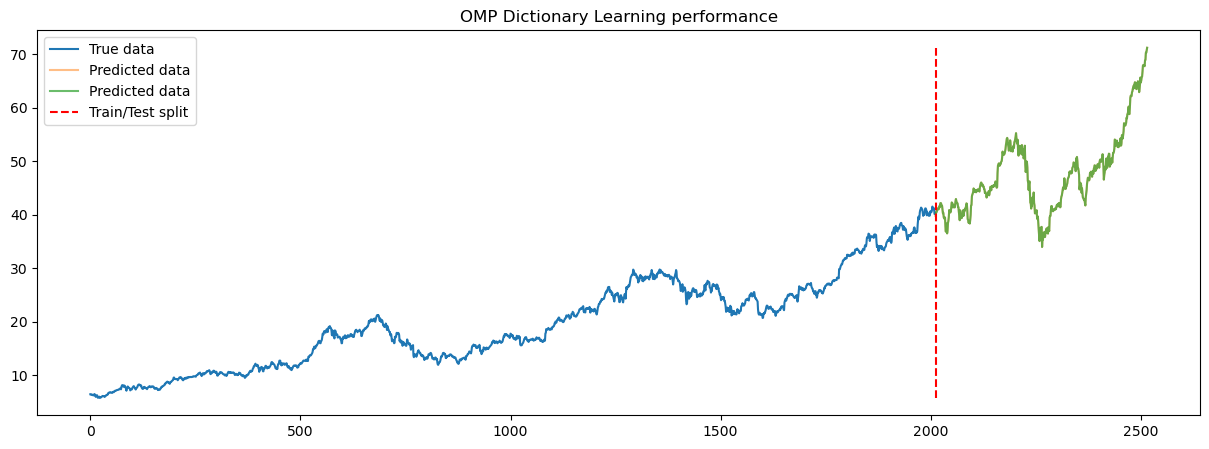

In [ ]:
plt.figure(figsize=(15, 5))
plt.title("OMP Dictionary Learning performance")
abscissa = np.arange(len(df))

plt.plot(abscissa[:len(data_historical)], data_historical, label="True data", color="blue")
plt.plot(abscissa[-len(data_test):], data_test, label="Predicted data", alpha=0.5, color="orange")
plt.plot(abscissa[-len(data_test):], data_predicted, label="Predicted data", alpha=0.7, color="green")

plt.vlines(len(data_historical), ymin=min(df), ymax=max(df), colors='black', linestyles='dashed', label="Train/Test split")

plt.legend()
plt.show()